In [77]:
import pandas as pd
import numpy as np
def load_data(file_path):
    """
    Load data from a CSV file and return a DataFrame.
    
    Parameters:
    file_path (str): The path to the CSV file.
    
    Returns:
    pd.DataFrame: The loaded data as a DataFrame.
    """
    try:
        data = pd.read_csv(file_path)
        return data
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

## Step 1: Reading and Understanding the Data

In [78]:
data = load_data('day.csv')

In [79]:
data.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [80]:
data.shape

(730, 16)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [82]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Data Cleaning
- `season` and `weathersit` should be converted to categorical labels – they are nominal, not ordinal.
- Treating these as numerical without conversion could mislead the model into assuming "summer > spring" or "rain = 3x cloudy", which is incorrect and can distort predictions.

In [83]:
data['season'] = data['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})

data['weathersit'] = data['weathersit'].map({
    1: 'clear',
    2: 'mist_cloudy',
    3: 'light_rain_snow',
    4: 'heavy_rain_snow'
})

Drop `instant`, and consider dropping `dteday` after extracting features if needed.

In [84]:
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y')

# Extract day
data['day'] = data['dteday'].dt.day
data = data.drop(['instant' ,'dteday'], axis=1)

## Step 3: Visualising the Data

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

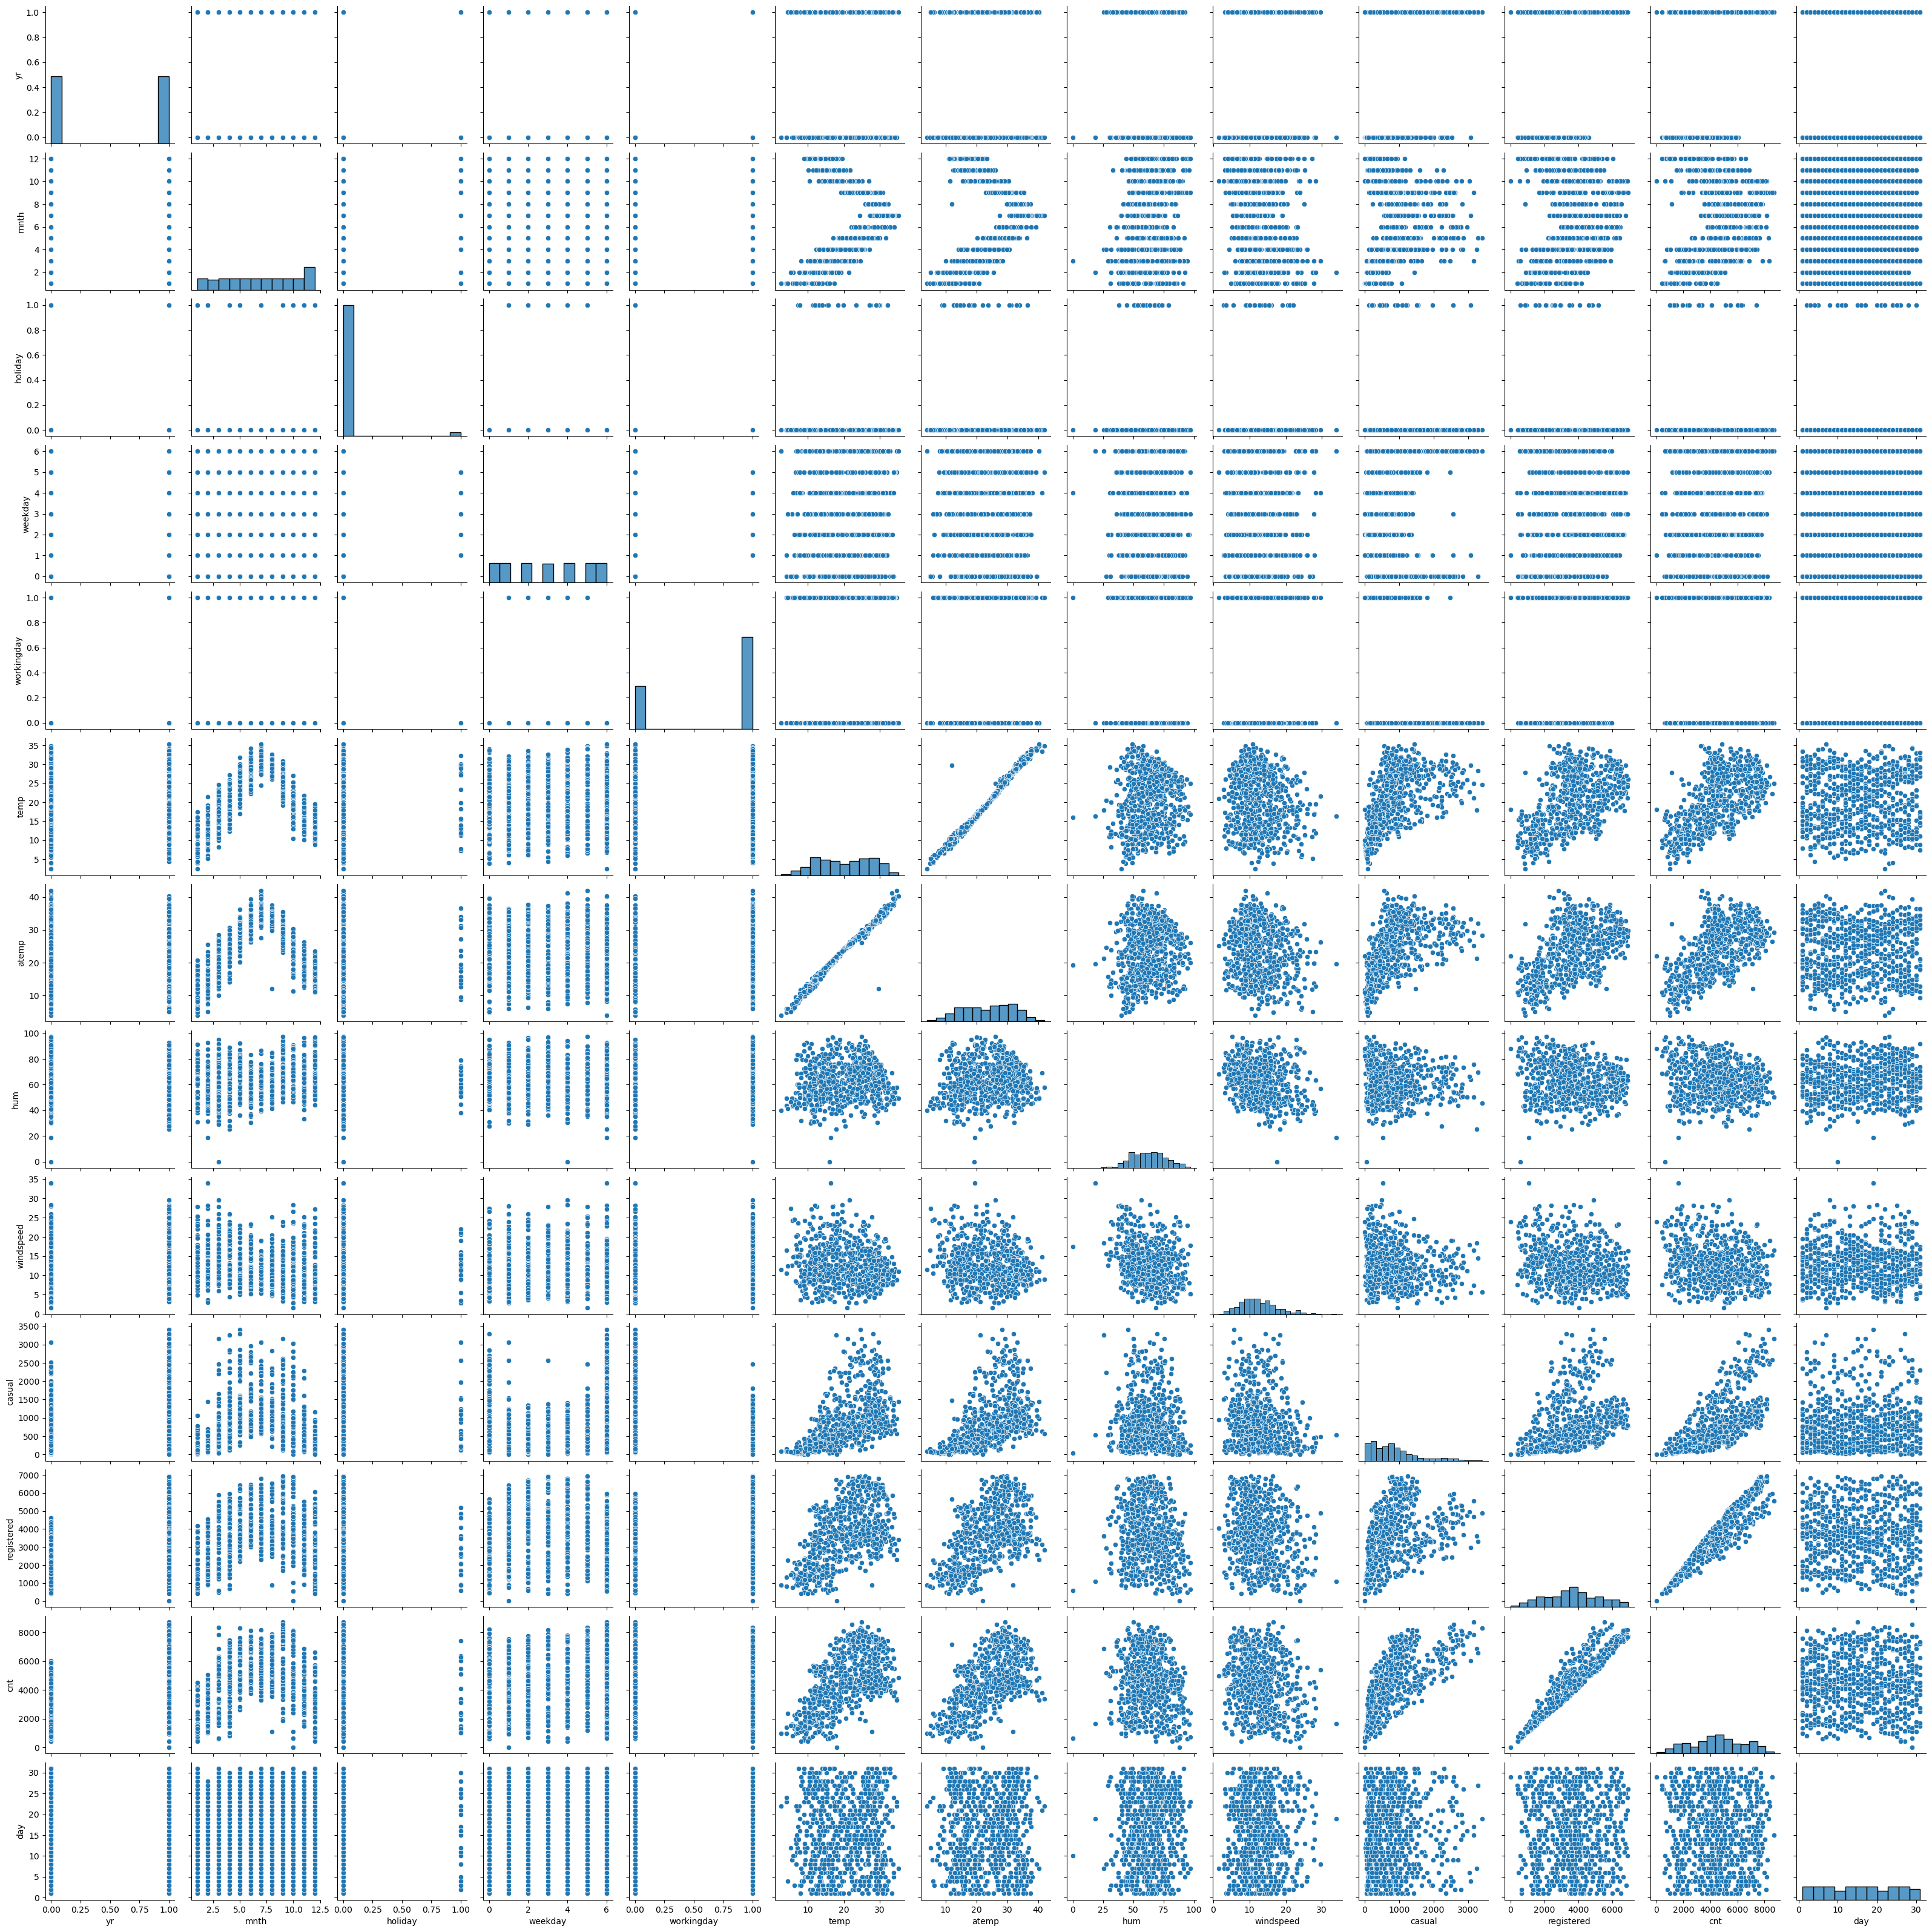

In [86]:
sns.pairplot(data)
plt.show()

### Infrences from the above plot 

- `day` does not shows any pattens or trend with `cnt` and have not much relevent to bike rental behavior. Can be dropped
- `temp` and `atemp` are almost perfectly correlated. Drop one of them to avoid multicollinearity.
- `cnt` is highly correlated with both `registered` and `casual` as expetced since `cnt = registered +casual`
- varriables like `mnth`, `season`, `yr`, `weekday` appear as vertical strips. These are categorical in nature and should be converted.
- varriables like `hum`, `windspeed`, `temp` show loose associations with `cnt`
- varriables like `holiday` and `workingday` show two vertical lines so they do not, box plot can show better picture

#### Visualising Categorical Variables


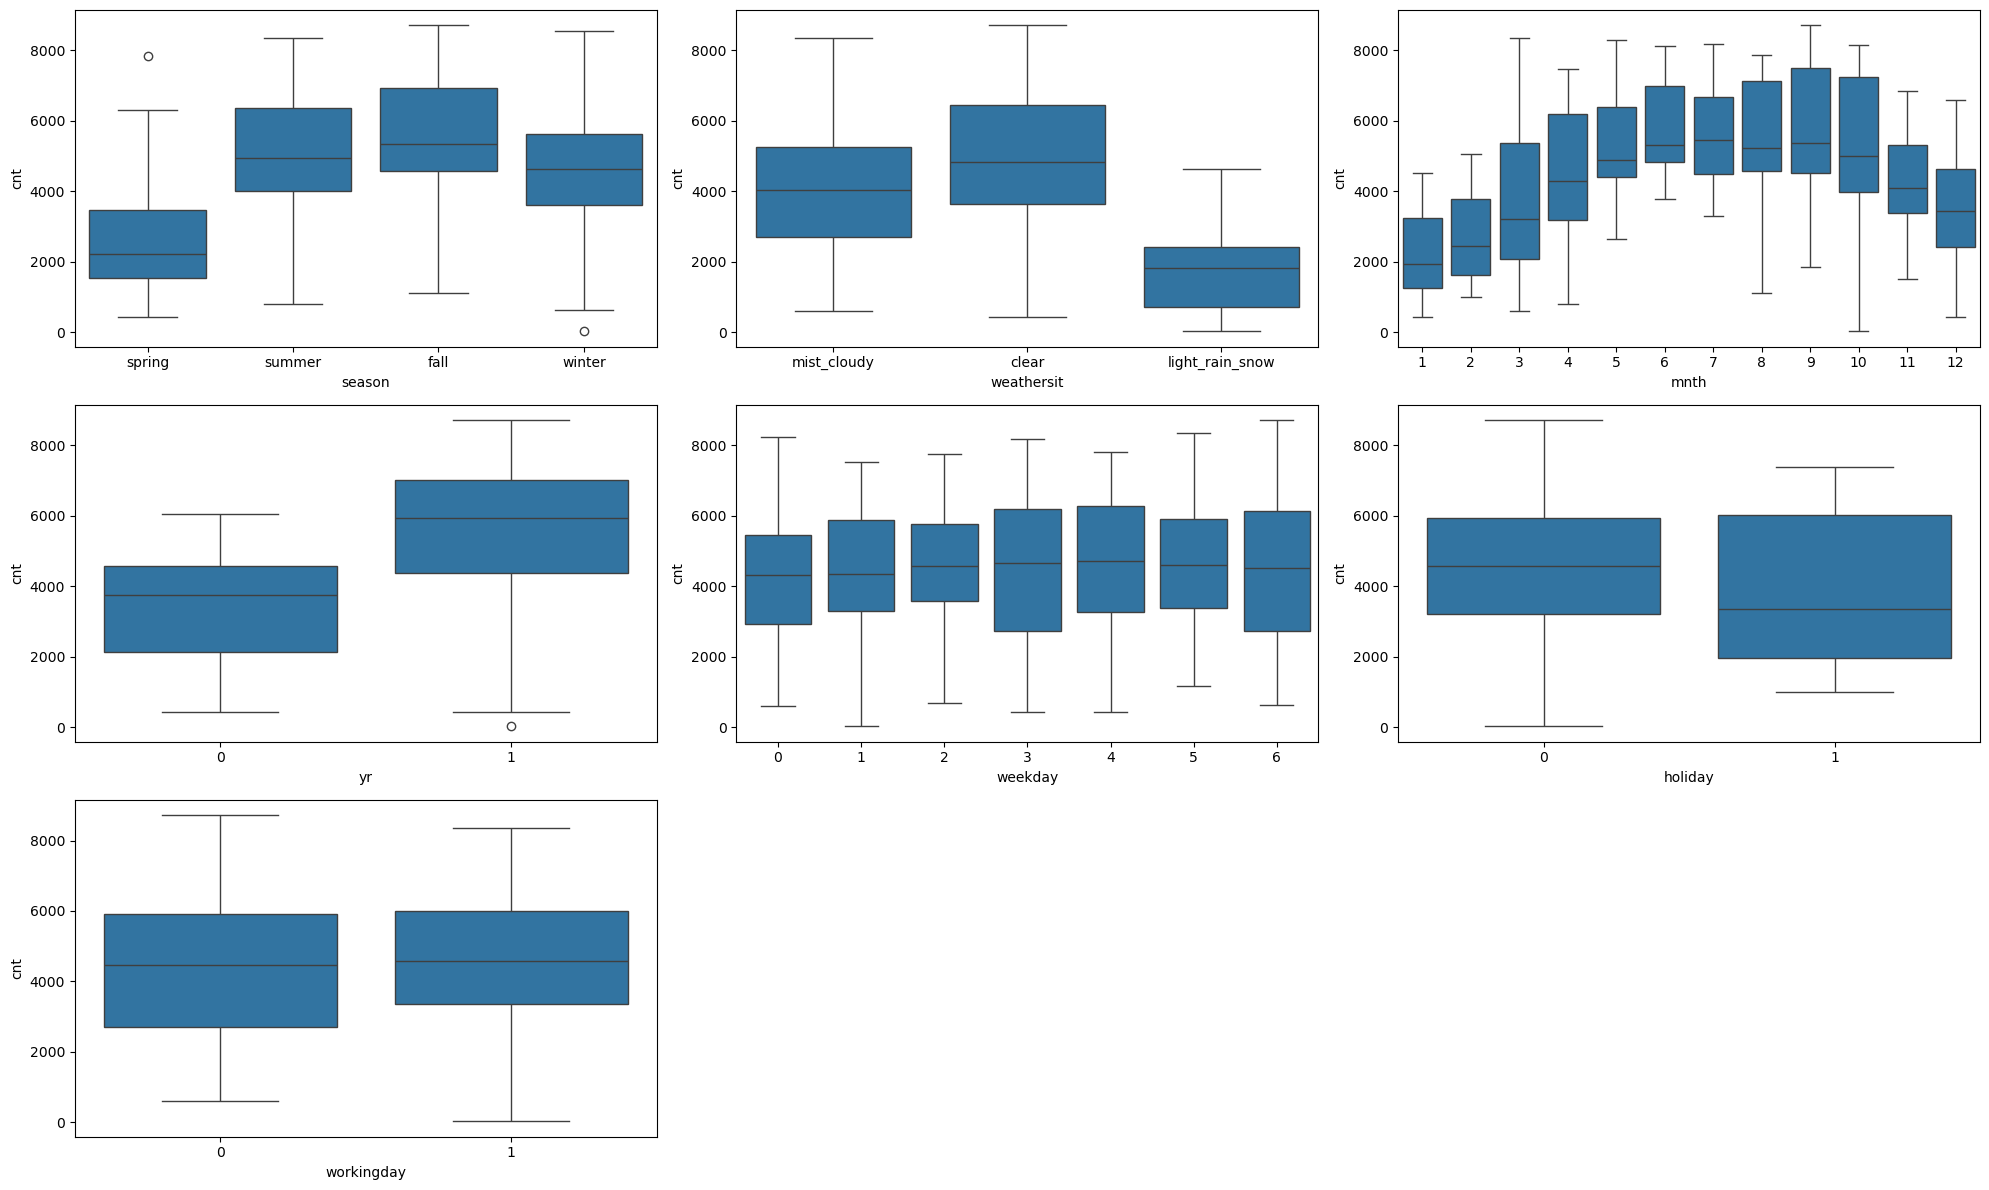

In [87]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.tight_layout()
plt.show()

| **Feature**      | **Impact on `cnt`** | **Insights**                                                                                                                                                  |
| ---------------- | ------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **`weathersit`** | ✅ **Strong**        | Rentals are **highest on clear days**, drop for mist/cloudy, and **lowest during rain/snow**. Weather condition has a clear inverse relationship with demand. |
| **`season`**     | ✅ **Strong**        | **Summer and Fall** see the most rentals, **Spring the least**. Clear seasonality effect.                                                                     |
| **`mnth`**       | ✅ **Very Strong**   | Peak usage from **June to September**. **Winter months (Dec–Feb)** show lower rentals. Monthly trend reflects seasonal demand.                                |
| **`yr`**         | ✅ **Moderate**      | **2019 had higher rentals** than 2018 — likely due to increased adoption or system expansion.                                                                 |
| **`weekday`**    | ⚠️ **Weak**         | Rental patterns are **fairly consistent across the week**, with only slight dips on Sundays.                                                                  |
| **`holiday`**    | ⚠️ **Low Impact**   | Slightly fewer rentals on holidays, but high variability. Possibly influenced by overlapping weekends/events.                                                 |
| **`workingday`** | ⚠️ **Minimal**      | No significant difference between working and non-working days in terms of rental count.                                                                      |


In [88]:
data.drop(['casual', 'registered'], axis=1, inplace=True)
data.drop(['day'], axis=1, inplace=True)
data.drop(['atemp'], axis=1, inplace=True)
data.drop(['weekday', 'holiday', 'workingday'], axis=1, inplace=True)

## Step 4: Data Prepration

In [89]:
varlist = ['season', 'weathersit', 'mnth', 'yr']

# One-hot encode the categorical variables and update the data DataFrame
data = pd.get_dummies(data, columns=varlist, drop_first=True)

In [90]:
data.head()

,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_light_rain_snow,weathersit_mist_cloudy,mnth_2,...,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,yr_1
0,14.110847,80.5833,10.749882,985,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,14.902598,69.6087,16.652113,801,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,8.050924,43.7273,16.636703,1349,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,8.200000,59.0435,10.739832,1562,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,9.305237,43.6957,12.522300,1600,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
data.describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


## Step 5: Split the data into Training and testing data set

In [92]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

## Step 6: Rescaling the data

In [93]:

num_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical features:", num_features)
# Check for missing values in the training set

### 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler on the training data and transform both train and test data
df_train_scaled = scaler.fit_transform(df_train)
df_test_scaled = scaler.transform(df_test)
# Convert the scaled arrays back to DataFrames
df_train_scaled = pd.DataFrame(df_train_scaled, columns=df_train.columns)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test.columns)


Numerical features: ['temp', 'hum', 'windspeed', 'cnt']


In [94]:
df_train_scaled.head().transpose()

,0,1,2,3,4
temp,0.509887,0.815169,0.442393,0.245101,0.395666
hum,0.575354,0.725633,0.640189,0.498067,0.504508
windspeed,0.300794,0.264686,0.255342,0.663106,0.188475
cnt,0.864243,0.827658,0.465255,0.204096,0.482973
season_spring,0.000000,0.000000,1.000000,1.000000,0.000000
season_summer,0.000000,0.000000,0.000000,0.000000,1.000000
season_winter,1.000000,0.000000,0.000000,0.000000,0.000000
weathersit_light_rain_snow,0.000000,0.000000,0.000000,0.000000,0.000000
weathersit_mist_cloudy,0.000000,0.000000,1.000000,0.000000,1.000000
mnth_2,0.000000,0.000000,0.000000,0.000000,0.000000


## Step 7: check the correlation coefficients to see which variables are highly correlated

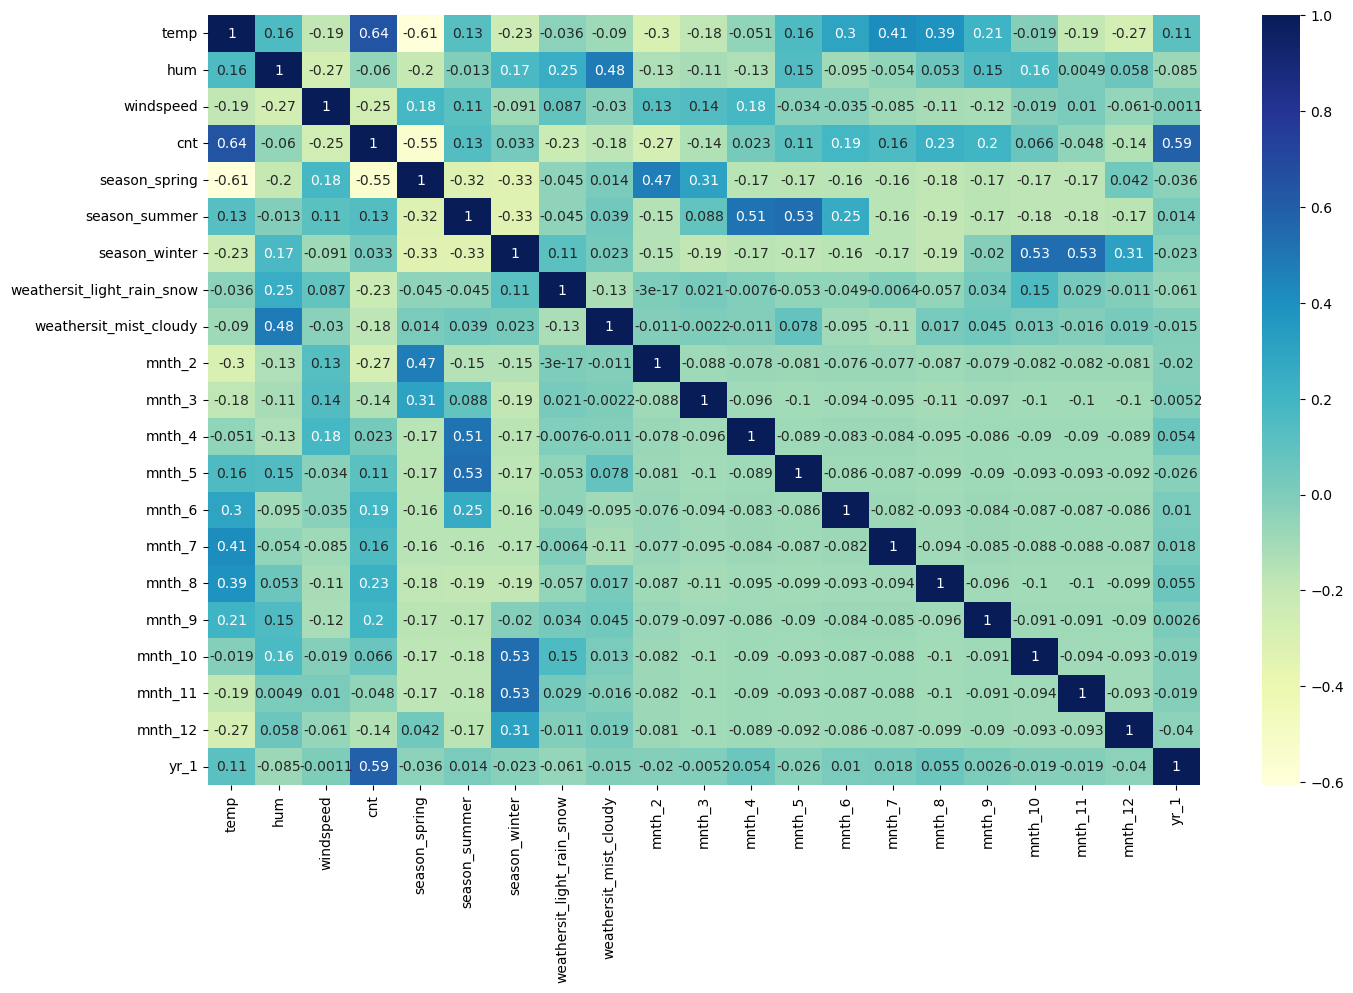

In [95]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train_scaled.corr(), annot = True, cmap="YlGnBu")
plt.show()


| **Feature**                        | **Correlation with `cnt`** | **Impact**            | **Comment**                          |
| ---------------------------------- | -------------------------- | --------------------- | ------------------------------------------- |
| `temp`                             | +0.64                      | 🔥 Strong Positive    | **Keep** — key predictor for demand         |
| `yr_1` (Year = 2019)               | +0.59                      | 📈 Strong Positive    | **Keep** — reflects system growth           |
| `season_summer`                    | +0.51                      | 🌞 Strong Positive    | **Keep** — high seasonal demand             |
| `mnth_9` (September)               | +0.53                      | 📅 Strong Positive    | **Keep** — peak usage month                 |
| `mnth_10` (October)                | +0.53                      | 📅 Strong Positive    | **Keep** — peak usage month                 |
| `weathersit_light_rain_snow`       | –0.35                      | 🌧️ Moderate Negative | **Keep** — dampens demand                   |
| `season_spring`                    | –0.55                      | 🌱 Strong Negative    |   |
| `windspeed`                        | –0.19                      | 🌬️ Weak Negative     | **Drop or bin** — minimal influence         |
| `humidity (hum)`                   | +0.06                      | 💧 Negligible         | **Drop** — no predictive value              |
| `mnth_1`–`mnth_12`                 | Low                        | 📉 Weak/Flat          |               |


#### We can drop following varriables:
1. windspeed - very low correlarion 
2. humidity - very low correlarion 

In [96]:
# drop the windspeed and hunidity columns as they have a very low correlation with the target variable 'cnt'
df_train_scaled = df_train_scaled.drop(['windspeed', 'hum'], axis=1)
df_test_scaled = df_test_scaled.drop(['windspeed', 'hum'], axis=1)

## Step 8: Building a linear model

In [97]:
# build a linear regression model using statsmodels
import statsmodels.api as sm
X_train = df_train_scaled.drop('cnt', axis=1)
y_train = df_train_scaled['cnt']
X_train = sm.add_constant(X_train)  # Add a constant term for the intercept
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sat, 21 Jun 2025   Prob (F-statistic):          8.42e-173
Time:                        21:20:20   Log-Likelihood:                 483.34
No. Observations:                 510   AIC:                            -928.7
Df Residuals:                     491   BIC:                            -848.2
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [98]:
print("Parameters:", model.params)
print("R-squared:", model.rsquared)

Parameters: const                         0.142377
temp                          0.408453
season_spring                -0.067971
season_summer                 0.022919
season_winter                 0.113020
weathersit_light_rain_snow   -0.302098
weathersit_mist_cloudy       -0.079808
mnth_2                        0.019116
mnth_3                        0.065468
mnth_4                        0.055128
mnth_5                        0.093139
mnth_6                        0.078529
mnth_7                        0.035850
mnth_8                        0.088981
mnth_9                        0.142643
mnth_10                       0.043618
mnth_11                      -0.010918
mnth_12                       0.003136
yr_1                          0.234851
dtype: float64
R-squared: 0.8252524231862658


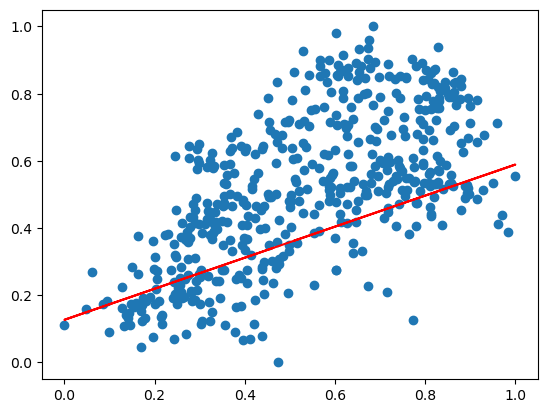

In [99]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train.iloc[:, 1], y_train)
plt.plot(X_train.iloc[:, 1], 0.127 + 0.462*X_train.iloc[:, 1], 'r')
plt.show()

In [100]:
# Checking the VIIF (Variance Inflation Factor) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    return vif
vif_data = calculate_vif(X_train)
print(vif_data)
# The VIF values are all below 5, indicating no multicollinearity issues.

    VIF Factor                    features
0    81.017897                       const
1     6.511071                        temp
2    10.657671               season_spring
3     8.185329               season_summer
4     9.402568               season_winter
5     1.061190  weathersit_light_rain_snow
6     1.061720      weathersit_mist_cloudy
7     1.687667                      mnth_2
8     2.779190                      mnth_3
9     5.086848                      mnth_4
10    6.468887                      mnth_5
11    6.549530                      mnth_6
12    8.632031                      mnth_7
13    9.689449                      mnth_8
14    6.701075                      mnth_9
15    6.005768                     mnth_10
16    5.415260                     mnth_11
17    3.503166                     mnth_12
18    1.037725                        yr_1


We can see from our past analysis that the `season_*` and `mnth_*` are highly correlated, we can drop `season_*` and keep `month_*` for finer granularity - Which will reduce the redundency 

In [104]:
# drop season_spring, season_summer, and season_winter as they are highly correlated with month 
drop_month = True
if drop_month == True:
    df_train_scaled = df_train_scaled.drop(['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12'], axis=1)
    df_test_scaled = df_test_scaled.drop(['mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12'], axis=1)   
else:
    df_train_scaled = df_train_scaled.drop(['season_spring', 'season_summer', 'season_winter'], axis=1)
    df_test_scaled = df_test_scaled.drop(['season_spring', 'season_summer', 'season_winter'], axis=1)

#### To validate linear regression assumptions:

1. Normality of residuals
2. Multicollinearity (VIF)

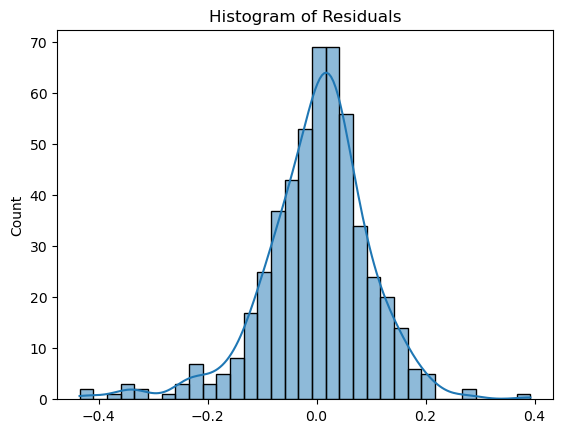

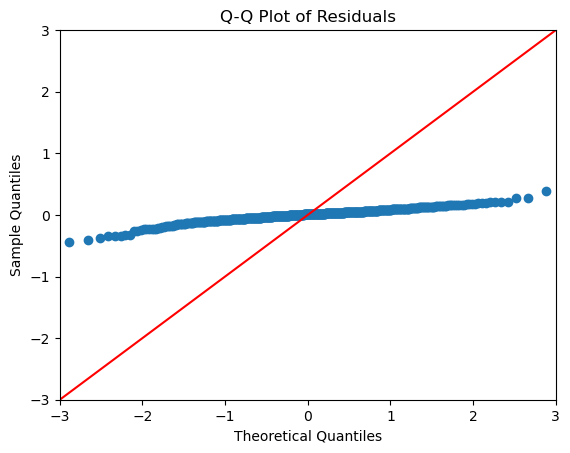


VIF Scores:
                      Feature        VIF
0                       const  46.070448
1                        temp   3.288718
2               season_spring   4.455441
3               season_summer   2.000451
4               season_winter   2.968406
5  weathersit_light_rain_snow   1.036069
6      weathersit_mist_cloudy   1.030579
7                        yr_1   1.019145


In [109]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 1. Check Normality of Residuals
residuals = model.resid

# Histogram
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

# 2. Check Multicollinearity (VIF)
X = pd.DataFrame(model.model.exog, columns=model.model.exog_names)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Scores:")
print(vif_data)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     298.5
Date:                Sat, 21 Jun 2025   Prob (F-statistic):          2.06e-174
Time:                        21:21:23   Log-Likelihood:                 457.10
No. Observations:                 510   AIC:                            -898.2
Df Residuals:                     502   BIC:                            -864.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

C:\Users\vikas\AppData\Local\Temp\ipykernel_18032\1457954817.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(X_train.iloc[:, 1], model.params[0] + model.params[1]*X_train.iloc[:, 1], 'r')


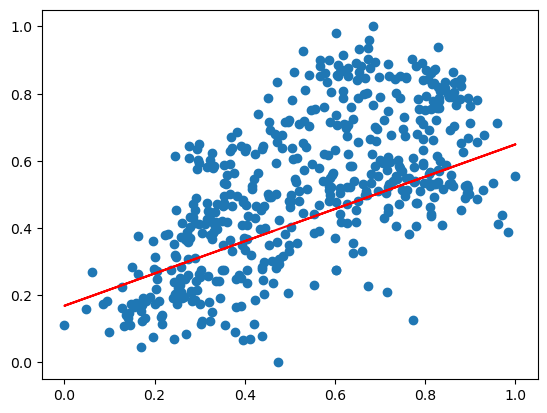

In [105]:
# Rebuild the model after dropping the highly correlated features
X_train = df_train_scaled.drop('cnt', axis=1)
y_train = df_train_scaled['cnt']
X_train = sm.add_constant(X_train)  # Add a constant term for the intercept
model = sm.OLS(y_train, X_train).fit()
print(model.summary())
# Let's visualize the data with a scatter plot and the fitted regression line
plt.scatter(X_train.iloc[:, 1], y_train)
plt.plot(X_train.iloc[:, 1], model.params[0] + model.params[1]*X_train.iloc[:, 1], 'r')
plt.show()

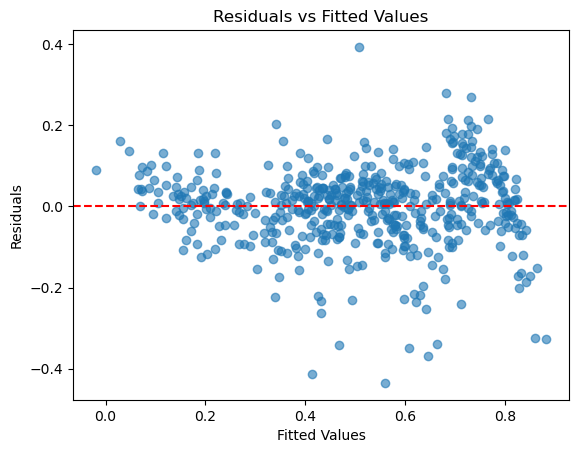

In [106]:
# Get fitted values and residuals
fitted_vals = model.fittedvalues
residuals = model.resid

# Plot
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()

In [71]:
vif_data = calculate_vif(X_train)
print(vif_data)

   VIF Factor                    features
0   47.377271                       const
1    3.387234                        temp
2    4.471421               season_spring
3    2.016857               season_summer
4    3.005201               season_winter
5    1.039565  weathersit_light_rain_snow
6    1.030760      weathersit_mist_cloudy
7    1.177735                     mnth_12
8    1.019290                        yr_1


Mean Squared Error: 0.009160150302105045
R-squared: 0.8071377104876065


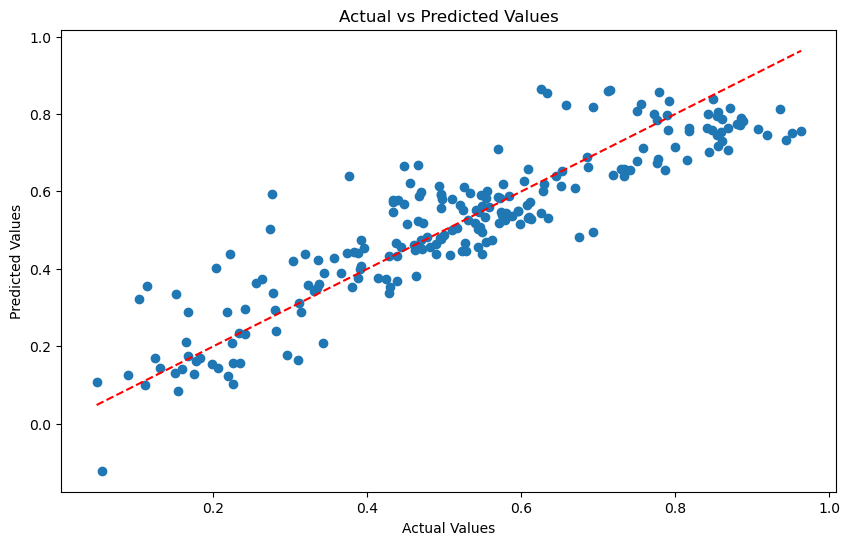

In [72]:
# Now we can make predictions on the test set
X_test = df_test_scaled.drop('cnt', axis=1)
y_test = df_test_scaled['cnt']
X_test = sm.add_constant(X_test)  # Add a constant term for the intercept
predictions = model.predict(X_test)
# Calculate the Mean Squared Error (MSE) and R-squared for the predictions
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
# Visualize the predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()